<a href="https://colab.research.google.com/github/ibonetc/DeepLearning_Salud/blob/main/AugmentationData_Keras_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aumentar datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

## Cargar los datos

In [3]:
!unzip "/content/drive/MyDrive/HealthData/COVID-RX.zip"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 extracting: COVID-RX/COVID/COVID-3009.png  
 extracting: COVID-RX/COVID/COVID-301.png  
 extracting: COVID-RX/COVID/COVID-3010.png  
 extracting: COVID-RX/COVID/COVID-3011.png  
 extracting: COVID-RX/COVID/COVID-3012.png  
 extracting: COVID-RX/COVID/COVID-3013.png  
 extracting: COVID-RX/COVID/COVID-3014.png  
 extracting: COVID-RX/COVID/COVID-3015.png  
 extracting: COVID-RX/COVID/COVID-3016.png  
 extracting: COVID-RX/COVID/COVID-3017.png  
 extracting: COVID-RX/COVID/COVID-3018.png  
 extracting: COVID-RX/COVID/COVID-3019.png  
 extracting: COVID-RX/COVID/COVID-302.png  
 extracting: COVID-RX/COVID/COVID-3020.png  
  inflating: COVID-RX/COVID/COVID-3021.png  
 extracting: COVID-RX/COVID/COVID-3022.png  
 extracting: COVID-RX/COVID/COVID-3023.png  
 extracting: COVID-RX/COVID/COVID-3024.png  
 extracting: COVID-RX/COVID/COVID-3025.png  
 extracting: COVID-RX/COVID/COVID-3026.png  
 extracting: COVID-RX/COVID/COVID-3

Tomando la primera imagen

In [4]:
pathimage='/content/COVID-RX/COVID/COVID-1.png'

In [5]:
imageKeras=load_img(pathimage, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest")

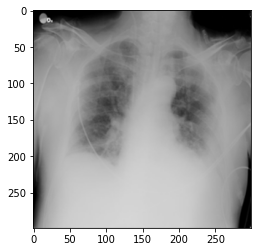

In [6]:
plt.imshow(imageKeras)

In [7]:
image = np.expand_dims(imageKeras,0)

## Aumentar los datos
Aumentar los datos es una forma de incrementar los datos, con imágenes creadas a partir de las imagenes que ya tenemos con pequeñas variaciones.

Tenemos una clase ***ImageDataGenerator*** que se utiliza para generar lotes de datos de imagen tensoriales con aumento de datos en tiempo real. Los datos se colocarán en bucle (en lotes) de forma indefinida. Los datos de imagen se generan transformando las imágenes de entrenamiento reales por rotación, recorte, desplazamiento, corte, zoom, giro, reflexión, normalización, etc.

### Rotación

*   **Rotaciones aleatorias**: para que el modelo se adapte a rotaciones de las imágenes, se peuden hacer rotaciones aleatorias de las imágenes durante el entrenamiento.

Por ejemplo si hacemos rotaciones hasta un rango de 90 grados:



In [8]:
datagen = ImageDataGenerator(rotation_range=90)
aug_iter=datagen.flow(image)

In [9]:
def plotImages(aug_iter,sub1=2,sub2=5, size=15):
  aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(sub1*sub2)]
  fig, axes = plt.subplots(sub1, sub2, figsize=(size,size))
  axes = axes.flatten()
  for img, ax in zip(aug_images, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

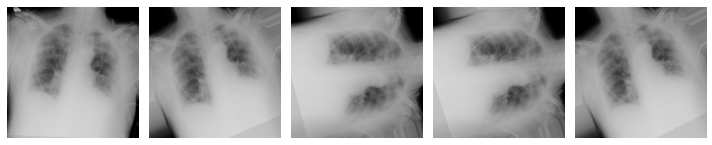

In [10]:
plotImages(aug_iter, 1,5,10)

### Movimientos verticales y horizontales

*   **Random Shifts**: La idea es que el los objetos se desplacen de su centro con movimientos aleatorios horizaontales y verticales, a partir de los argumentos **width_shift_range** y **height_shift_range**

*width_shift_range* es un número de punto flotante entre 0.0 y 1.0 que especifica el límite superior de la fracción del ancho total por el cual la imagen se desplazará aleatoriamente, ya sea hacia la izquierda o hacia la derecha.

*height_shift_range* es también un número entre 0 y 1, pero esta vez se mueve de manera vertical.


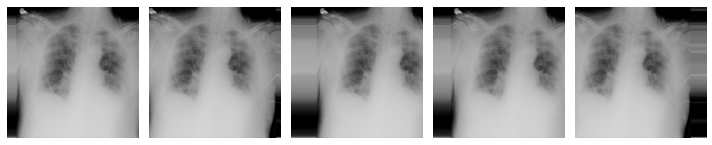

In [11]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1,5,10)

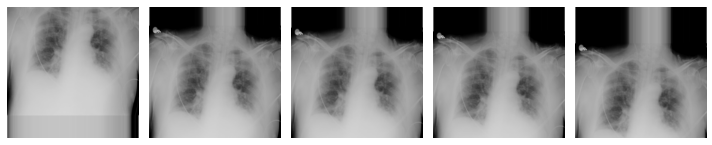

In [12]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1,5,10)

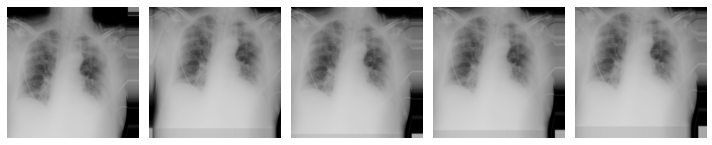

In [13]:
shift = 0.1
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Giros aleatorios

*   **Random Flips**: Crea giros aleatorios de la imagen en el eje horizontal y vertical, a través de los argumentos **vertical_flip** y **horizontal_flip**



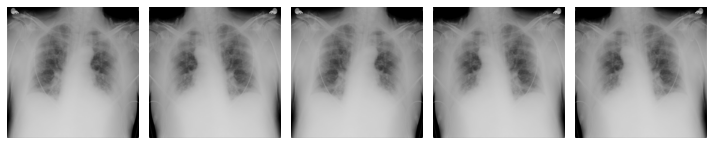

In [14]:
datagen = ImageDataGenerator(horizontal_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

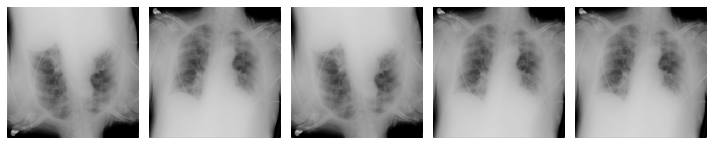

In [15]:
datagen = ImageDataGenerator(vertical_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

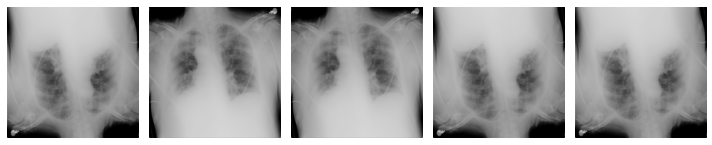

In [16]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Transformación de corte, transvección (Shear)

*   **Shear**: Distorsiona la imagen a partir de un ángulo determinado, para verla desde otra perspectiva. Para esto se utiliza el argumento *shear_range*





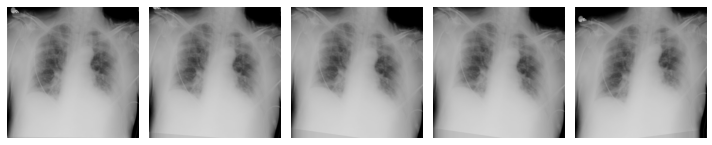

In [17]:
datagen = ImageDataGenerator(shear_range=10)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Zoom

*   Zoom: Amplía la imagen de manera aleatoria. Un valor del argumento zoom_range menor que 1.0 amplía la imagen, mientras que un zoom mayor que 1.0 reduce la imagen.



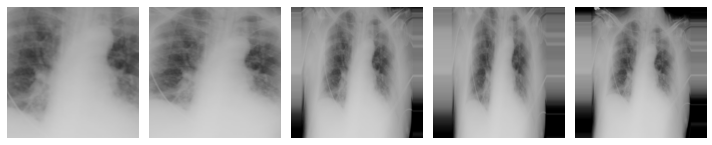

In [18]:
datagen = ImageDataGenerator(zoom_range=[0.5, 1.5])
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Movimiento de canal (Channel Shift)

Mueve los valores del canal de color con el argumento **channel_shift_range**

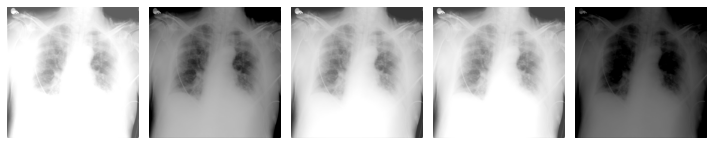

In [19]:
datagen = ImageDataGenerator(channel_shift_range=150.0)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

### Rellenar regiones de la imagen
Con algunas de estas transformaciones se adicionan partes a la imagen distorcionada, por ejemplo en los desplazamiento, para que la imagen mantenga el tamaño habrá un pedazo distorcionado. Para esto se pude utilizar el argumento **fill_mode** con diferentes formas de rellenar:



*   *nearest*: Esta es la opción predeterminada donde se elige el valor de píxel más cercano y se repite para todos los valores vacíos
*   *reflect*: Este modo crea un "reflejo" y llena los valores vacíos en orden inverso a los valores conocidos
*   wrap: Crea un efecto de "envoltura" copiando los valores de los puntos conocidos en los puntos desconocidos, manteniendo el orden sin cambios
*   *constant*: Si queremos llenar todos los puntos que se encuentran fuera de los límites de la entrada con un valor constante, este modo nos ayuda a lograr exactamente eso. El valor constante se especifica mediante el argumento **cval**



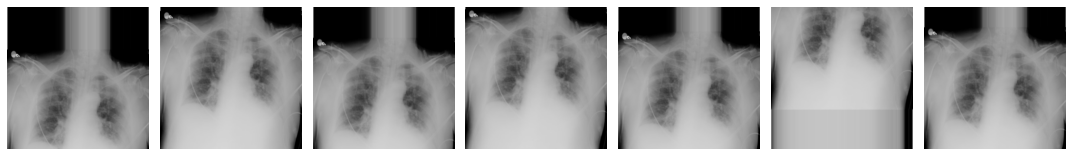

In [20]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='nearest')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 7, 15)

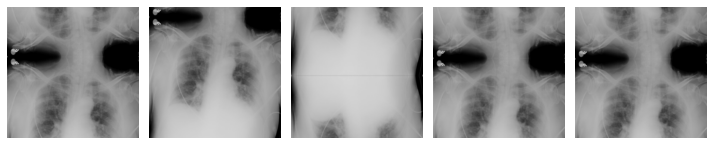

In [21]:
shift = 0.5
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='reflect')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

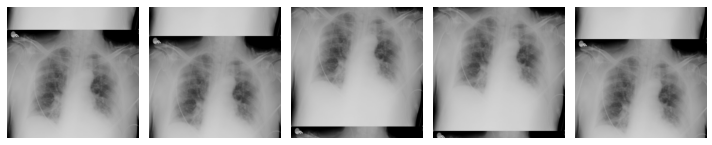

In [22]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='wrap')
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

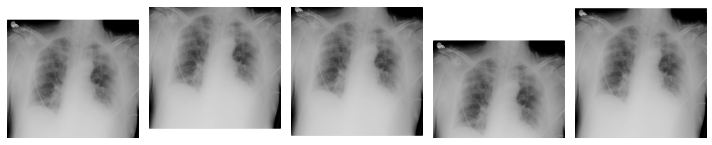

In [23]:
shift = 0.3
datagen = ImageDataGenerator(height_shift_range=shift, fill_mode='constant', cval=255)
aug_iter=datagen.flow(image)
plotImages(aug_iter, 1, 5, 10)

Aplicando varias transformacioenes

In [24]:
datagen = ImageDataGenerator(rotation_range=90, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.15, 
                         zoom_range=0.1, 
                         channel_shift_range=10., 
                         horizontal_flip=True,
                         vertical_flip=True,
                         )

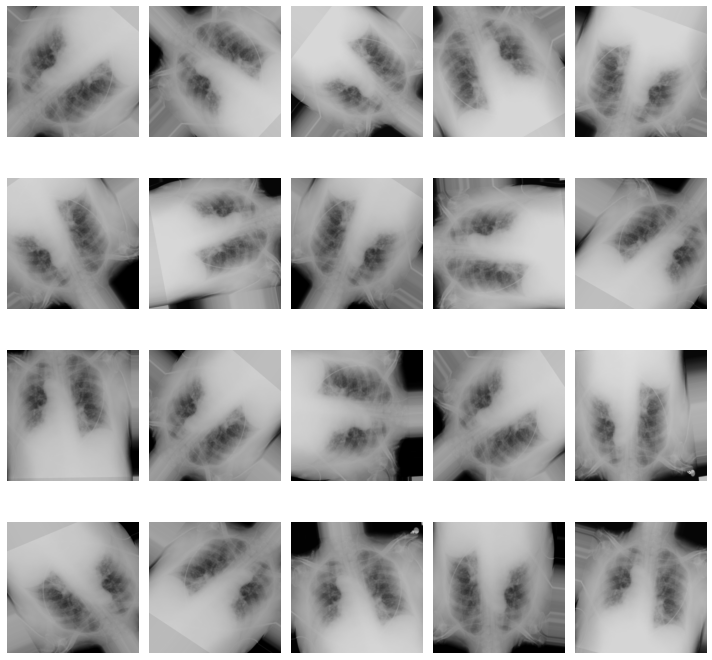

In [25]:
aug_iter=datagen.flow(image)
plotImages(aug_iter, 4, 5, 10)

Esta clase también tiene el argumento **rescale** que permite hacer la normalización de las imágenes dividiéndolas por 255

`rescale=1./255`

## Cargar los datos con la función *flow_from_directory* de *ImageDataGenerator*

Para esto los datos deben estar separados en carpetas que tengan el nombre de las clases.

Para hacerlo con este ejemplo vamos a dividir las imágenes en carpetas diferentes. Y ya los vamos a dividir en entrenamiento y validación

In [26]:
path='/content/COVID-RX'

In [27]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
                              rotation_range=90, 
                              width_shift_range=0.1, 
                              height_shift_range=0.1, 
                              shear_range=0.15, 
                              zoom_range=0.1, 
                              channel_shift_range=10., 
                              horizontal_flip=True,
                              vertical_flip=True,
                             validation_split=0.2)

In [28]:
batch_size=32
train_it = datagen.flow_from_directory(path, class_mode='binary', 
                                       batch_size=batch_size, target_size=(224, 224),subset='training')
val_it = datagen.flow_from_directory(path, class_mode='binary', 
                                      batch_size=batch_size, target_size=(224, 224),subset='validation',shuffle=False)

Found 5787 images belonging to 2 classes.
Found 1446 images belonging to 2 classes.


In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D,MaxPooling2D, Dense, Activation
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image

In [30]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=model.inputs, outputs=output)

#opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

58900480/58889256 [==============================] - 1s 0us/step


In [31]:
history = model.fit(train_it, steps_per_epoch=len(train_it),
                              validation_data=val_it, validation_steps=len(val_it), 
                              epochs=5, verbose=1)

Epoch 1/5
181/181 [==============================] - 144s 719ms/step - loss: 0.5203 - accuracy: 0.7693 - val_loss: 0.3443 - val_accuracy: 0.8686
Epoch 2/5
181/181 [==============================] - 125s 690ms/step - loss: 0.4001 - accuracy: 0.8215 - val_loss: 0.2543 - val_accuracy: 0.8949
Epoch 3/5
181/181 [==============================] - 125s 691ms/step - loss: 0.3616 - accuracy: 0.8355 - val_loss: 0.2633 - val_accuracy: 0.8976
Epoch 4/5
181/181 [==============================] - 125s 689ms/step - loss: 0.3478 - accuracy: 0.8471 - val_loss: 0.3295 - val_accuracy: 0.8748
Epoch 5/5
181/181 [==============================] - 125s 690ms/step - loss: 0.3396 - accuracy: 0.8500 - val_loss: 0.2412 - val_accuracy: 0.9094


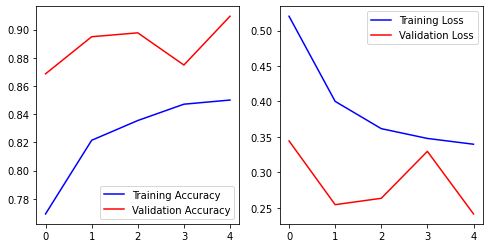

In [32]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()